In [133]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re # regular expression
import string 

In [134]:
# load data set
df=pd.read_csv('comment train.csv')

In [135]:
df

id                                       comment_text  \
0       0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1       000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2       000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3       0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4       0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
...                  ...                                                ...   
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        malignant  highly_malignant  rude  threat  abuse  loathe  
0               0                 0     0       0      0       0  
1               0                 0     0       0      0       0  
2               0                 0     0       0      0       0  
3               0                 0     0       0      0       0  
4               0                 0     0       0      0       0  
...           ...               ...   ...     ...    ...     ...  
159566          0                 0     0       0      0       0  
159567          0                 0     0       0      0       0  
159568          0                 0     0       0      0       0  
159569          0                 0     0       0      0       0  
159570          0                 0     0       0      0       0  

[159571 rows x 8 columns]

In [136]:
# remove unnecessary columns
df.drop(columns='id',inplace=True)

In [137]:
# checking data types
df.dtypes

comment_text        object
malignant            int64
highly_malignant     int64
rude                 int64
threat               int64
abuse                int64
loathe               int64
dtype: object

In [138]:
# checking null  values
df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [139]:
df

comment_text  malignant  \
0       Explanation\nWhy the edits made under my usern...          0   
1       D'aww! He matches this background colour I'm s...          0   
2       Hey man, I'm really not trying to edit war. It...          0   
3       "\nMore\nI can't make any real suggestions on ...          0   
4       You, sir, are my hero. Any chance you remember...          0   
...                                                   ...        ...   
159566  ":::::And for the second time of asking, when ...          0   
159567  You should be ashamed of yourself \n\nThat is ...          0   
159568  Spitzer \n\nUmm, theres no actual article for ...          0   
159569  And it looks like it was actually you who put ...          0   
159570  "\nAnd ... I really don't think you understand...          0   

        highly_malignant  rude  threat  abuse  loathe  
0                      0     0       0      0       0  
1                      0     0       0      0       0  
2                      0     0       0      0       0  
3                      0     0       0      0       0  
4                      0     0       0      0       0  
...                  ...   ...     ...    ...     ...  
159566                 0     0       0      0       0  
159567                 0     0       0      0       0  
159568                 0     0       0      0       0  
159569                 0     0       0      0       0  
159570                 0     0       0      0       0  

[159571 rows x 7 columns]

In [140]:
df['comment_text'][25]

'Radial symmetry \n\nSeveral now extinct lineages included in the Echinodermata were bilateral such as Homostelea, or even asymmetrical such as Cothurnocystis (Stylophora).\n\n-'

In [141]:
df['loathe'][25]

0

In [142]:
# make copy of data set
a=df.copy()

In [143]:
a.head(20)

comment_text  malignant  \
0   Explanation\nWhy the edits made under my usern...          0   
1   D'aww! He matches this background colour I'm s...          0   
2   Hey man, I'm really not trying to edit war. It...          0   
3   "\nMore\nI can't make any real suggestions on ...          0   
4   You, sir, are my hero. Any chance you remember...          0   
5   "\n\nCongratulations from me as well, use the ...          0   
6        COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   
7   Your vandalism to the Matt Shirvington article...          0   
8   Sorry if the word 'nonsense' was offensive to ...          0   
9   alignment on this subject and which are contra...          0   
10  "\nFair use rationale for Image:Wonju.jpg\n\nT...          0   
11  bbq \n\nbe a man and lets discuss it-maybe ove...          0   
12  Hey... what is it..\n@ | talk .\nWhat is it......          1   
13  Before you start throwing accusations and warn...          0   
14  Oh, and the girl above started her arguments w...          0   
15  "\n\nJuelz Santanas Age\n\nIn 2002, Juelz Sant...          0   
16  Bye! \n\nDon't look, come or think of comming ...          1   
17   REDIRECT Talk:Voydan Pop Georgiev- Chernodrinski          0   
18  The Mitsurugi point made no sense - why not ar...          0   
19  Don't mean to bother you \n\nI see that you're...          0   

    highly_malignant  rude  threat  abuse  loathe  
0                  0     0       0      0       0  
1                  0     0       0      0       0  
2                  0     0       0      0       0  
3                  0     0       0      0       0  
4                  0     0       0      0       0  
5                  0     0       0      0       0  
6                  1     1       0      1       0  
7                  0     0       0      0       0  
8                  0     0       0      0       0  
9                  0     0       0      0       0  
10                 0     0       0      0       0  
11                 0     0       0      0       0  
12                 0     0       0      0       0  
13                 0     0       0      0       0  
14                 0     0       0      0       0  
15                 0     0       0      0       0  
16                 0     0       0      0       0  
17                 0     0       0      0       0  
18                 0     0       0      0       0  
19                 0     0       0      0       0

In [144]:
# distinguse highly abusive comments 
highly_abuse_comment=a.loc[(a['malignant']==1) & (a['highly_malignant']==1) & (a['rude']==1) & (a['threat']==1) & (a['loathe']==1)]

In [145]:
# review all by highly abuse,rude,malignant comments
highly_abuse_comment

comment_text  malignant  \
1017    WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...          1   
1312    SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!          1   
7299    You're a stupid cunt \n\nFuck you dumb arse, y...          1   
13648   Bitch \n\nYou are a little bitch. I fuckin spe...          1   
13964   I am going to murder ZimZalaBim ST47 for being...          1   
22158   FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...          1   
29968   u motherfukkin bitch i want to rape you smelly...          1   
32098   Fuck All Asyriac Nation \n\nQamishli belong to...          1   
33951   GO FUCK YOURSELF BITCH.  I HATE YOUR SOULD.  M...          1   
38513   AM GOING TO RAPE YOU IN THE ASS YOU FAT BITCH ...          1   
38578   fuck you honkey, why you hatin' on blacks? You...          1   
46155         So fuck off and die, rape fantasising sluts          1   
55160   ANYONE WHO SUPPORTS THIS IS FUCKING SICK. MEN ...          1   
59279   JEW \n\nGet the fuck out of here you jewish so...          1   
65075   FAGGOTS!  YO FUCKER IT WAS FUCKING HAYES YOU F...          1   
67247   YOURE A FRREAKING JEW, AND PLEAZE COMMIT SUICIDE.          1   
73821   Shut up you asswipe, we don't care. I'll decap...          1   
77139   Eat shit you fucking arse rapping jew fucking ...          1   
80612   I hit a jack off all day, after the rape my mo...          1   
82141   Help! \n\nIf you become an admin, I will fucki...          1   
99819   Glenn Beck is a faggot. He likes dick in his a...          1   
100222  Urgent!!!! \n\nMind yo own fucken buisiness st...          1   
106617  , I hope your retarded kids get anal raped and...          1   
116767  Go fuck yourself!!! you fucking delteted it an...          1   
118928  You god damn son of a bitch you fucking blocke...          1   
123794  She is a Motherfucker \n\nI will block you Mot...          1   
133551  and your little faggot boy Propol, pray, pray ...          1   
142513  faggot \n\nYou lil piece of shit I haven’t van...          1   
151131  LGBT \n\nyou little fuck , are you a fag , tha...          1   
157428  Ok.... \n\nBitch i swear to God i will fuckin ...          1   
159400  Shalom \n\nSemite, get the fuck out of here. I...          1   

        highly_malignant  rude  threat  abuse  loathe  
1017                   1     1       1      1       1  
1312                   1     1       1      1       1  
7299                   1     1       1      1       1  
13648                  1     1       1      1       1  
13964                  1     1       1      1       1  
22158                  1     1       1      1       1  
29968                  1     1       1      1       1  
32098                  1     1       1      1       1  
33951                  1     1       1      1       1  
38513                  1     1       1      1       1  
38578                  1     1       1      1       1  
46155                  1     1       1      1       1  
55160                  1     1       1      1       1  
59279                  1     1       1      1       1  
65075                  1     1       1      1       1  
67247                  1     1       1      1       1  
73821                  1     1       1      1       1  
77139                  1     1       1      1       1  
80612                  1     1       1      1       1  
82141                  1     1       1      1       1  
99819                  1     1       1      1       1  
100222                 1     1       1      1       1  
106617                 1     1       1      1       1  
116767                 1     1       1      1       1  
118928                 1     1       1      1       1  
123794                 1     1       1      1       1  
133551                 1     1       1      1       1  
142513                 1     1       1      1       1  
151131                 1     1       1      1       1  
157428                 1     1       1      1       1  
1594

In [146]:
# checking text length
a['text_length']=a['comment_text'].str.len()

In [147]:
a

comment_text  malignant  \
0       Explanation\nWhy the edits made under my usern...          0   
1       D'aww! He matches this background colour I'm s...          0   
2       Hey man, I'm really not trying to edit war. It...          0   
3       "\nMore\nI can't make any real suggestions on ...          0   
4       You, sir, are my hero. Any chance you remember...          0   
...                                                   ...        ...   
159566  ":::::And for the second time of asking, when ...          0   
159567  You should be ashamed of yourself \n\nThat is ...          0   
159568  Spitzer \n\nUmm, theres no actual article for ...          0   
159569  And it looks like it was actually you who put ...          0   
159570  "\nAnd ... I really don't think you understand...          0   

        highly_malignant  rude  threat  abuse  loathe  text_length  
0                      0     0       0      0       0          264  
1                      0     0       0      0       0          112  
2                      0     0       0      0       0          233  
3                      0     0       0      0       0          622  
4                      0     0       0      0       0           67  
...                  ...   ...     ...    ...     ...          ...  
159566                 0     0       0      0       0          295  
159567                 0     0       0      0       0           99  
159568                 0     0       0      0       0           81  
159569                 0     0       0      0       0          116  
159570                 0     0       0      0       0          189  

[159571 rows x 8 columns]

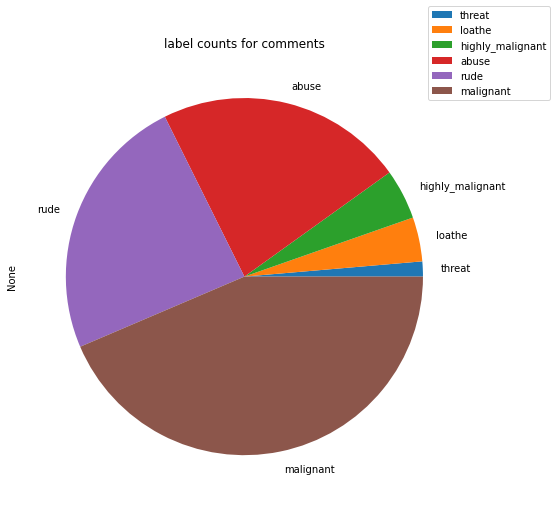

In [148]:
# value counts
comments_label=['malignant','highly_malignant','rude','threat','abuse','loathe']
values_count=a[comments_label].sum().sort_values(ascending=True)
values_count.plot(kind='pie',figsize=(8,9),title='label counts for comments').legend(loc='center left',bbox_to_anchor=(.9,1))

In [149]:
# import nltk libraries
import nltk
from nltk.corpus import stopwords # for  stop words
from nltk.stem import WordNetLemmatizer # for lemmatization
from nltk.tokenize import word_tokenize # for word tokenize
from nltk import pos_tag # for part of speech

In [150]:
# string punctuation
punch=string.punctuation
punch

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [151]:
# replace time with 'time'
a['comment_text']=a['comment_text'].str.replace(r'\s(\d{2}\:\d{2}\s?)','time')
a['comment_text']=a['comment_text'].str.replace(r'(\d{2}\.\d{3}\.\d{3}\.\d{3})','ipaddress')

In [152]:
a['comment_text'][37]

"pretty much everyone from warren county/surrounding regions was born at glens falls hospital. myself included. however, i'm not sure this qualifies anyone as being a glens falls native. rachel ray is, i believe, actually from the town of lake luzerne.  —The preceding unsigned comment was added by ipaddress time:57, August 19, 2007 (UTC)"

In [153]:
# replace date format with 'date'
a['comment_text']=a['comment_text'].str.replace(r'(Jan|Feb|Mar|Apr|Jun|Jul|Aug|Sep|Oct|Nov|Dec)(\.)?(\w*)(\.)?(\s*\d{2}\s*),(\s*\d{4})','date')

In [154]:
# replace number with numbr
a['comment_text']=a['comment_text'].str.replace(r'\d+(\.\d+)?','numbr')

In [155]:
# remove head and tail and white spaces
a['comment_text']=a['comment_text'].str.replace(r'^\s+',' ')
a['comment_text']=a['comment_text'].str.replace(r'^\s+|\s+?',' ')

In [156]:
lemma=WordNetLemmatizer() # lemmatization use
stop_words=set(stopwords.words('english')+['u','ur','4','2','im','dont','doin','urs']) # stop words use

In [157]:
def cleantext(text):
    text=str(text).lower()  # lower the cases
    spl_char=re.sub(r'[^a-zA-Z0-9]',' ',text) # remove punctuation
    token=nltk.word_tokenize(spl_char)   # word tokenization
    words=[word for word in token if word not in stop_words ] # remove stop words
    tag_list=pos_tag(words,tagset=None) # part of speech use
    clean_text=[]
    for token,pos_token in tag_list:
        if pos_token.startswith('V'): #verb
            pos_val='v'
        elif pos_token.startswith('J'):# adjectove
            pos_val='a'
        elif pos_token.startswith('R'): #adverb 
            pos_val='r'
        else:
            pos_val='n' #noun
        lema_words=lemma.lemmatize(token,pos_val)
        clean_text.append(lema_words)
        
    return " ".join(clean_text)   

In [158]:
# apply created function 
a['clean_comment']=a['comment_text'].apply(cleantext)

In [159]:
a['clean_length']=a['clean_comment'].str.len()

In [160]:
a.head(10)

comment_text  malignant  \
0  Explanation Why the edits made under my userna...          0   
1  D'aww! He matches this background colour I'm s...          0   
2  Hey man, I'm really not trying to edit war. It...          0   
3  " More I can't make any real suggestions on im...          0   
4  You, sir, are my hero. Any chance you remember...          0   
5  "  Congratulations from me as well, use the to...          0   
6       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK          1   
7  Your vandalism to the Matt Shirvington article...          0   
8  Sorry if the word 'nonsense' was offensive to ...          0   
9  alignment on this subject and which are contra...          0   

   highly_malignant  rude  threat  abuse  loathe  text_length  \
0                 0     0       0      0       0          264   
1                 0     0       0      0       0          112   
2                 0     0       0      0       0          233   
3                 0     0       0      0       0          622   
4                 0     0       0      0       0           67   
5                 0     0       0      0       0           65   
6                 1     1       0      1       0           44   
7                 0     0       0      0       0          115   
8                 0     0       0      0       0          472   
9                 0     0       0      0       0           70   

                                       clean_comment  clean_length  
0  explanation edits make username hardcore metal...           165  
1  aww match background colour seemingly stuck th...            69  
2  hey man really try edit war guy constantly rem...           128  
3  make real suggestion improvement wonder sectio...           352  
4                      sir hero chance remember page            29  
5             congratulation well use tool well talk            38  
6                        cocksucker piss around work            27  
7  vandalism matt shirvington article revert plea...            52  
8  sorry word nonsense offensive anyway intend wr...           278  
9               alignment subject contrary dulithgow            36

In [161]:
a.shape

(159571, 10)

In [162]:
# clean text
a['clean_comment'][25]

'radial symmetry several extinct lineage include echinodermata bilateral homostelea even asymmetrical cothurnocystis stylophora'

In [163]:
# saving text comment for pos tag
b=a['clean_comment'][151131]

In [164]:
b

'lgbt little fuck fag piece shit page making fuck claim islam certify allow site claim mehmet conqueror fag swear know write kill'

In [165]:
# pos tag chech in text 
pos_tag(nltk.word_tokenize(b),tagset=None)

[('lgbt', 'JJ'),
 ('little', 'JJ'),
 ('fuck', 'JJ'),
 ('fag', 'JJ'),
 ('piece', 'NN'),
 ('shit', 'JJ'),
 ('page', 'NN'),
 ('making', 'VBG'),
 ('fuck', 'JJ'),
 ('claim', 'NN'),
 ('islam', 'NN'),
 ('certify', 'VB'),
 ('allow', 'JJ'),
 ('site', 'NN'),
 ('claim', 'NN'),
 ('mehmet', 'VBD'),
 ('conqueror', 'NN'),
 ('fag', 'NN'),
 ('swear', 'NN'),
 ('know', 'VBP'),
 ('write', 'CD'),
 ('kill', 'NNS')]

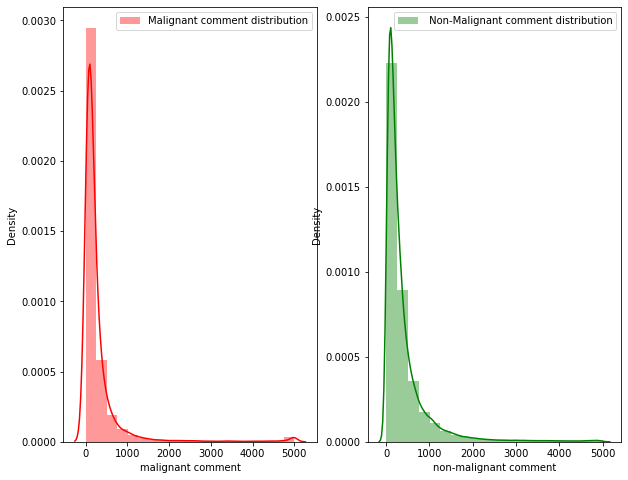

In [166]:
f,ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(a[a['malignant']==1]['text_length'],bins=20,ax=ax[0],label=['Malignant comment distribution'],color='r')
ax[0].set_xlabel('malignant comment')
ax[0].legend()

sns.distplot(a[a['malignant']==0]['text_length'],bins=20,ax=ax[1],label=[' Non-Malignant comment distribution'],color='g')
ax[1].set_xlabel('non-malignant comment')
ax[1].legend()

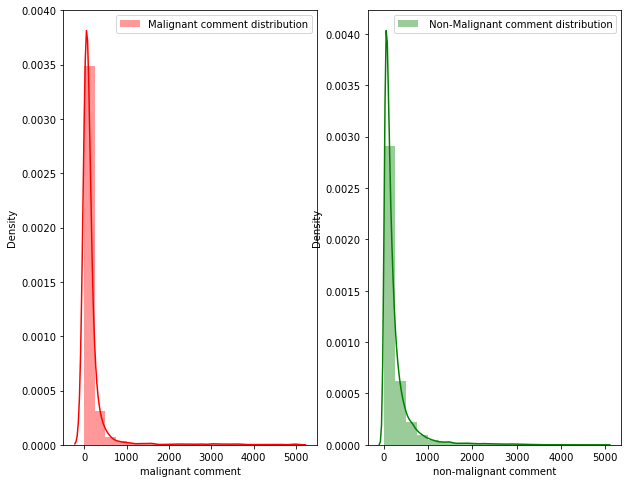

In [167]:
f,ax = plt.subplots(1,2,figsize=(10,8))
sns.distplot(a[a['abuse']==1]['clean_length'],bins=20,ax=ax[0],label=['Malignant comment distribution'],color='r')
ax[0].set_xlabel('malignant comment')
ax[0].legend()

sns.distplot(a[a['abuse']==0]['clean_length'],bins=20,ax=ax[1],label=[' Non-Malignant comment distribution'],color='g')
ax[1].set_xlabel('non-malignant comment')
ax[1].legend()

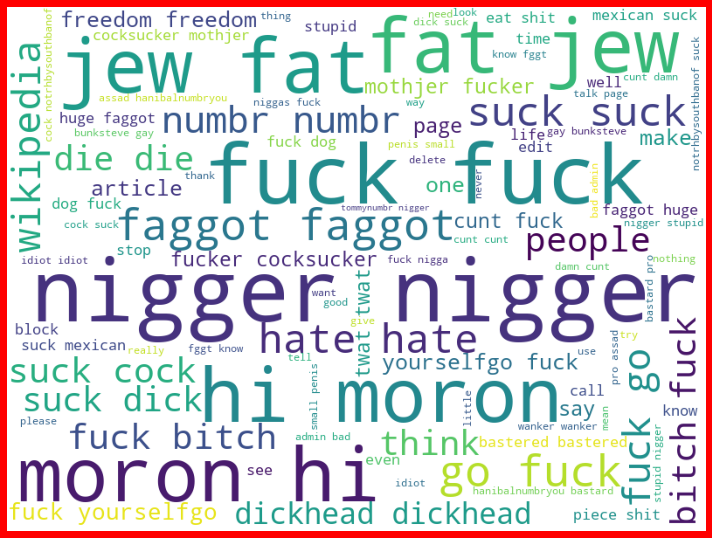

In [168]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['abuse']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

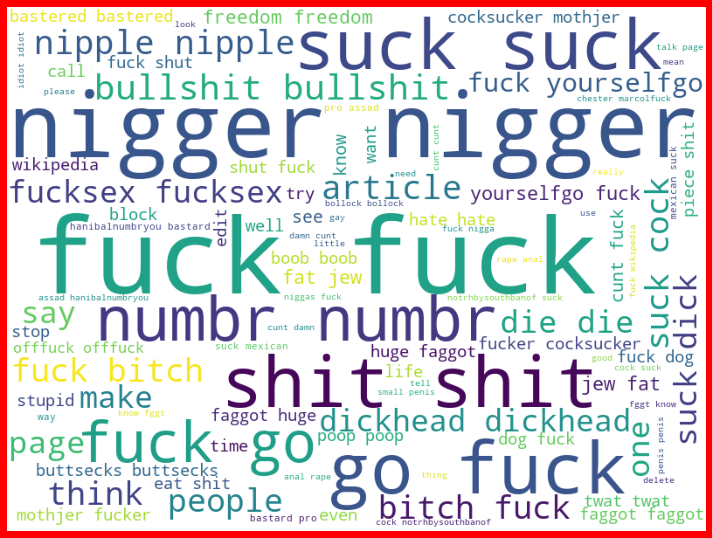

In [169]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['rude']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

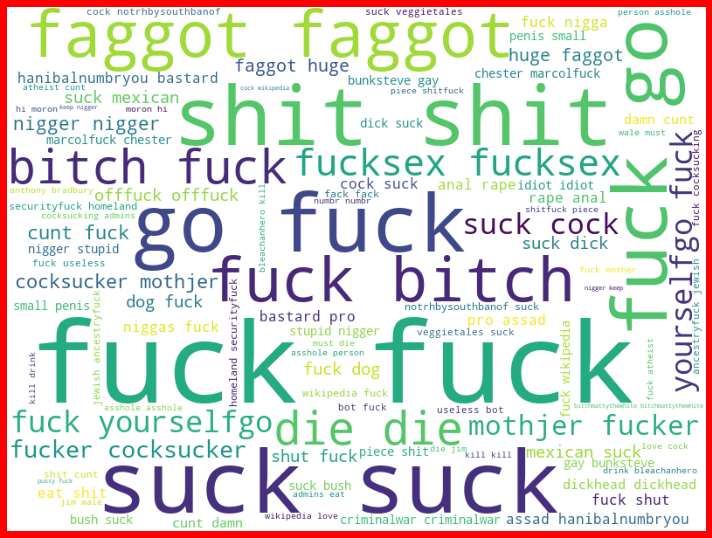

In [170]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['highly_malignant']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

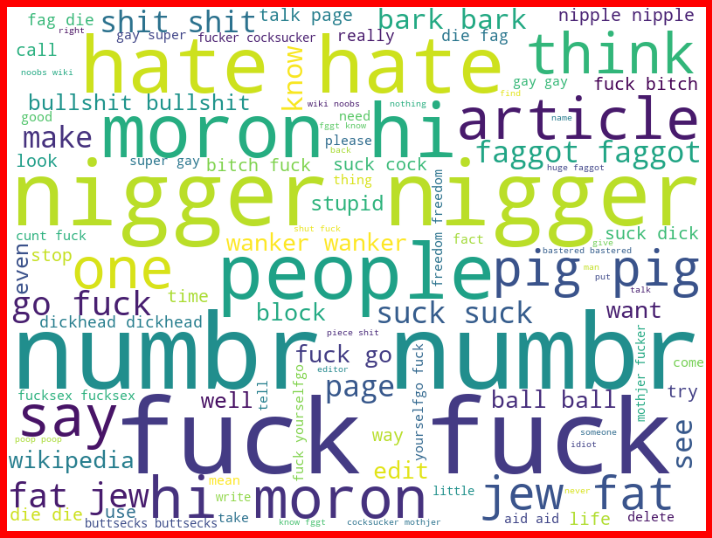

In [171]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['malignant']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

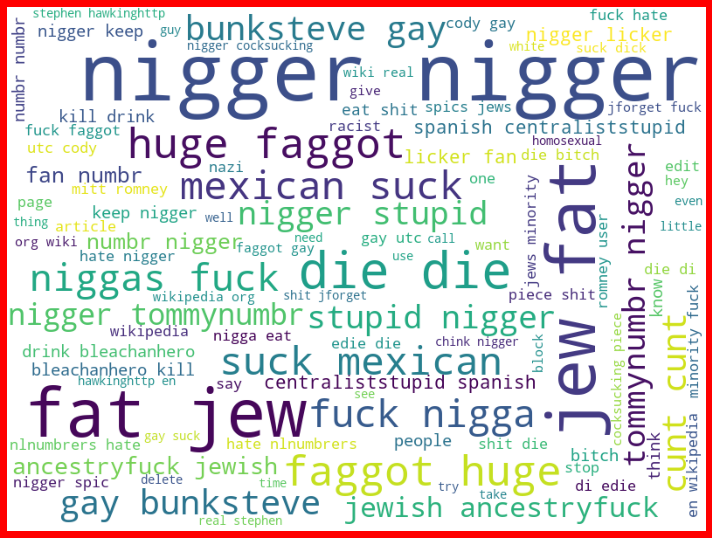

In [172]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['loathe']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

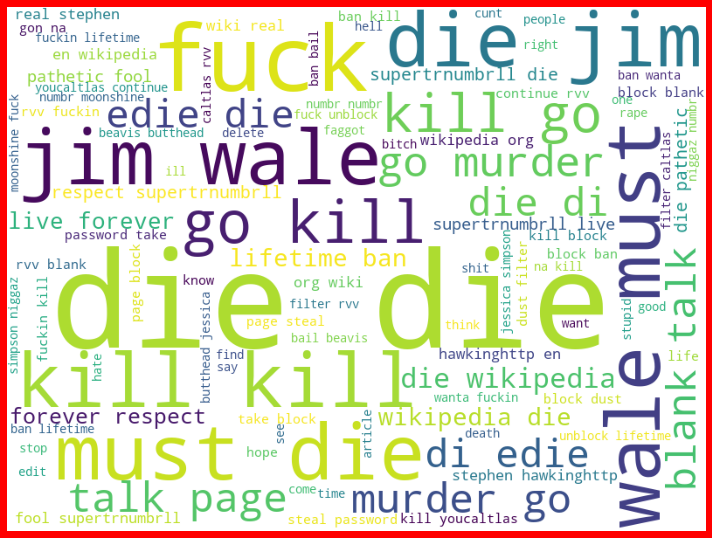

In [173]:
# generate wordcloud
from wordcloud import WordCloud

malignant=a['clean_comment'][a['threat']==1]
malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

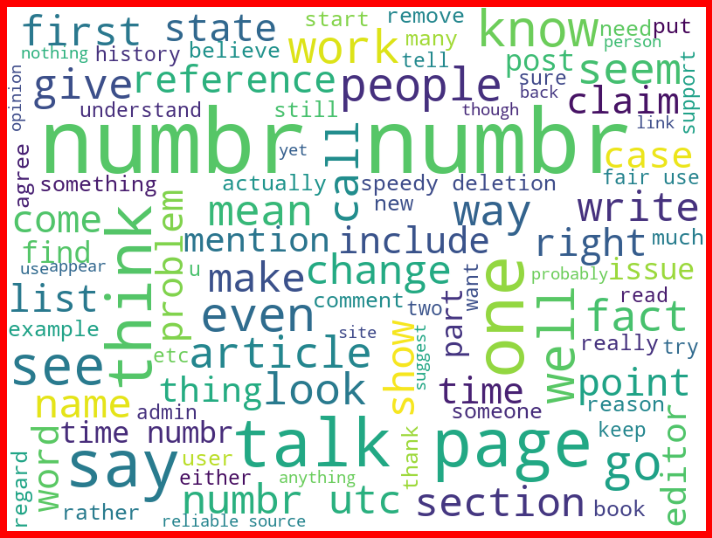

In [174]:
non_malignant=a['clean_comment'][a['abuse']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

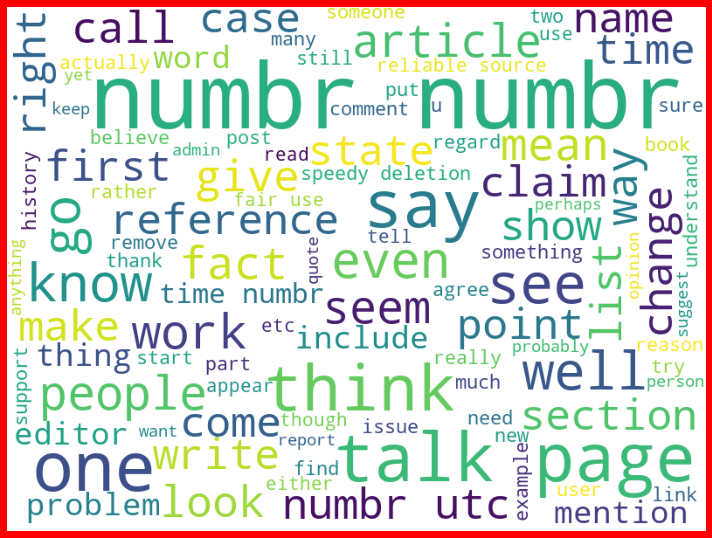

In [175]:
non_malignant=a['clean_comment'][a['malignant']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

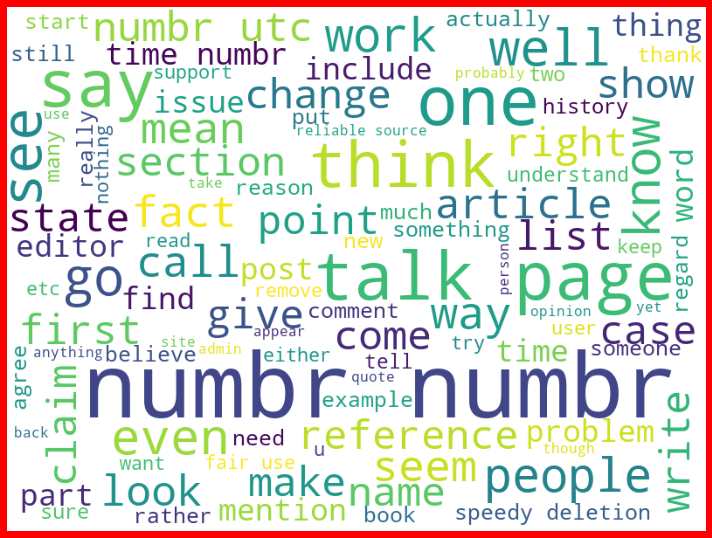

In [176]:
non_malignant=a['clean_comment'][a['highly_malignant']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

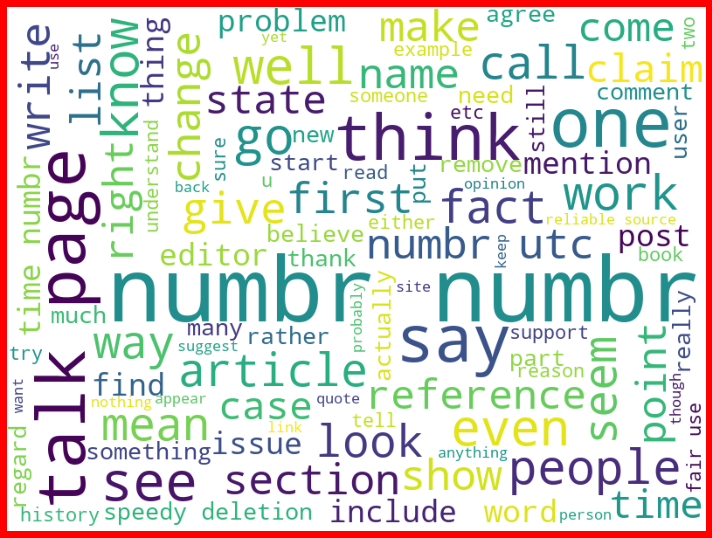

In [177]:
non_malignant=a['clean_comment'][a['rude']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

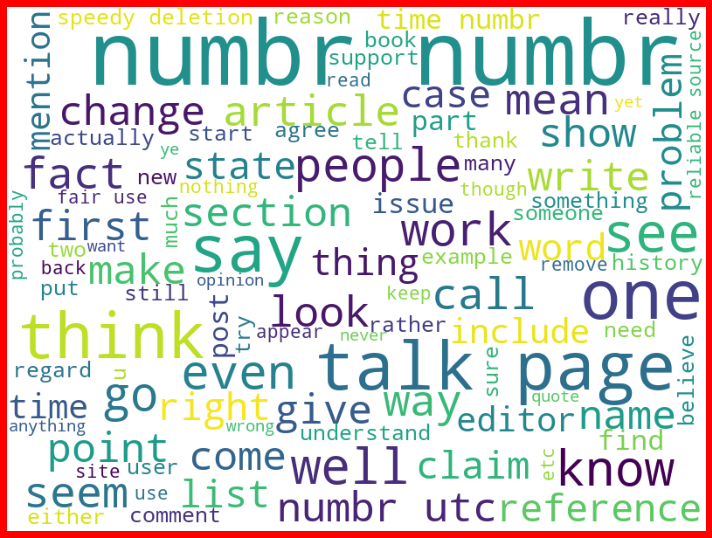

In [178]:
non_malignant=a['clean_comment'][a['threat']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

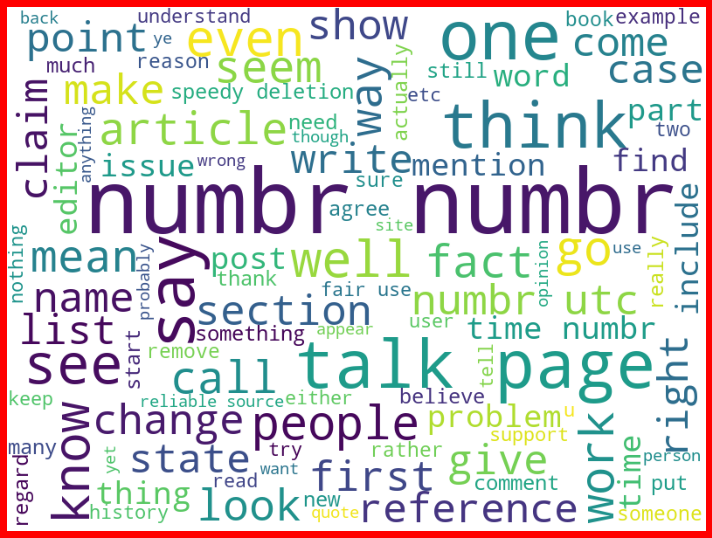

In [179]:
non_malignant=a['clean_comment'][a['loathe']==0]
non_malignant_cloud=WordCloud(width=800,height=600,background_color='white',max_words=100).generate(' '.join(non_malignant))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(non_malignant_cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [181]:
tfidf=TfidfVectorizer(analyzer='word')
x_train=tfidf.fit_transform(a['clean_comment'])

In [182]:
tfidf.vocabulary_

{'explanation': 47388,
 'edits': 42293,
 'make': 84597,
 'username': 150966,
 'hardcore': 60288,
 'metallica': 88736,
 'fan': 48419,
 'revert': 120793,
 'vandalisms': 151739,
 'closure': 26374,
 'gas': 54271,
 'vote': 154093,
 'new': 96143,
 'york': 160822,
 'doll': 39543,
 'fac': 47845,
 'please': 109908,
 'remove': 119464,
 'template': 141236,
 'talk': 139849,
 'page': 104951,
 'since': 130488,
 'retire': 120582,
 'numbr': 98847,
 'aww': 11265,
 'match': 86410,
 'background': 11700,
 'colour': 27350,
 'seemingly': 127059,
 'stuck': 136514,
 'thanks': 142006,
 'time': 143668,
 'date': 33737,
 'utc': 151146,
 'hey': 62216,
 'man': 85020,
 'really': 117498,
 'try': 146592,
 'edit': 42198,
 'war': 154842,
 'guy': 59031,
 'constantly': 29158,
 'relevant': 119199,
 'information': 68118,
 'instead': 68817,
 'seem': 127053,
 'care': 21838,
 'format': 51679,
 'actual': 1415,
 'info': 68057,
 'real': 117436,
 'suggestion': 137357,
 'improvement': 66940,
 'wonder': 158454,
 'section': 126925,
 

In [183]:
x_train.shape,y.shape

((159571, 162330), (159571, 6))

In [184]:
y=a.iloc[:,1:7]
y

malignant  highly_malignant  rude  threat  abuse  loathe
0               0                 0     0       0      0       0
1               0                 0     0       0      0       0
2               0                 0     0       0      0       0
3               0                 0     0       0      0       0
4               0                 0     0       0      0       0
...           ...               ...   ...     ...    ...     ...
159566          0                 0     0       0      0       0
159567          0                 0     0       0      0       0
159568          0                 0     0       0      0       0
159569          0                 0     0       0      0       0
159570          0                 0     0       0      0       0

[159571 rows x 6 columns]

In [232]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,f1_score,auc,hamming_loss

In [195]:
train_x,test_x,train_y,test_y=train_test_split(x_train,y,test_size=0.3,random_state=1,)

In [196]:
train_x.shape,test_x.shape

((111699, 162330), (47872, 162330))

In [197]:
train_y.shape,test_y.shape

((111699, 6), (47872, 6))

In [198]:
train_y

malignant  highly_malignant  rude  threat  abuse  loathe
39130           0                 0     0       0      0       0
25049           0                 0     0       0      0       0
437             1                 0     1       0      1       0
93449           0                 0     0       0      0       0
35166           0                 0     0       0      0       0
...           ...               ...   ...     ...    ...     ...
73349           0                 0     0       0      0       0
109259          0                 0     0       0      0       0
50057           0                 0     0       0      0       0
5192            0                 0     0       0      0       0
128037          1                 1     1       0      0       0

[111699 rows x 6 columns]

In [220]:
naive=MultinomialNB()
clf=OneVsRestClassifier(naive)
clf.fit(train_x,train_y)
y_pred_nv=clf.predict(test_x)
print('train score =>\t',clf.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_nv)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_nv,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred_nv,target_names=y.columns))

train score =>	 90.07242678985487
accuracy score =>	 89.74557152406418
f1 score =>	 18.271272072127605
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.99      0.17      0.28      4695
highly_malignant       0.00      0.00      0.00       491
            rude       0.98      0.10      0.18      2544
          threat       0.00      0.00      0.00       154
           abuse       0.92      0.03      0.07      2387
          loathe       0.00      0.00      0.00       442

       micro avg       0.98      0.10      0.19     10713
       macro avg       0.48      0.05      0.09     10713
    weighted avg       0.87      0.10      0.18     10713
     samples avg       0.02      0.01      0.01     10713



In [209]:
from sklearn.linear_model import LogisticRegression

In [225]:
lg=LogisticRegression()
clf1=OneVsRestClassifier(lg)
clf1.fit(train_x,train_y)
y_pred_lg=clf1.predict(test_x)
print('train score =>\t',clf1.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred_lg)*100)
print('f1 score =>\t',f1_score(test_y,y_pred_lg,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred_lg,target_names=y.columns))

train score =>	 92.49411364470586
accuracy score =>	 91.68407419786097
f1 score =>	 65.06558608113785
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.93      0.58      0.72      4695
highly_malignant       0.55      0.24      0.34       491
            rude       0.90      0.61      0.73      2544
          threat       0.73      0.07      0.13       154
           abuse       0.82      0.49      0.61      2387
          loathe       0.70      0.15      0.24       442

       micro avg       0.88      0.53      0.66     10713
       macro avg       0.77      0.36      0.46     10713
    weighted avg       0.87      0.53      0.65     10713
     samples avg       0.05      0.05      0.05     10713



In [211]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)

In [212]:
clf2=OneVsRestClassifier(dtc)
clf2.fit(train_x,train_y)
y_pred=clf2.predict(test_x)
print('train score =>\t',clf2.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred)*100)
print('f1 score =>\t',f1_score(test_y,y_pred,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred,target_names=y.columns))

train score =>	 99.91136894690194
accuracy score =>	 89.41343582887701
f1 score =>	 65.33183244580941
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.73      0.67      0.70      4695
highly_malignant       0.36      0.27      0.31       491
            rude       0.76      0.74      0.75      2544
          threat       0.33      0.21      0.26       154
           abuse       0.61      0.59      0.60      2387
          loathe       0.47      0.34      0.40       442

       micro avg       0.68      0.63      0.66     10713
       macro avg       0.54      0.47      0.50     10713
    weighted avg       0.68      0.63      0.65     10713
     samples avg       0.06      0.06      0.06     10713



In [213]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=1)
clf3=OneVsRestClassifier(rfc)
clf3.fit(train_x,train_y)
y_pred1=clf3.predict(test_x)
print('train score =>\t',clf3.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred1)*100)
print('f1 score =>\t',f1_score(test_y,y_pred1,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred1,target_names=y.columns))

train score =>	 99.90778789425153
accuracy score =>	 91.34149398395722
f1 score =>	 60.79232430142319
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.94      0.53      0.68      4695
highly_malignant       0.43      0.05      0.08       491
            rude       0.91      0.60      0.73      2544
          threat       0.60      0.04      0.07       154
           abuse       0.82      0.44      0.57      2387
          loathe       0.62      0.07      0.12       442

       micro avg       0.90      0.48      0.63     10713
       macro avg       0.72      0.29      0.38     10713
    weighted avg       0.87      0.48      0.61     10713
     samples avg       0.05      0.04      0.04     10713



In [214]:
from xgboost import XGBClassifier

In [215]:
xg=XGBClassifier(disable_default_eval_metric=1)
clf4=OneVsRestClassifier(xg)
clf4.fit(train_x,train_y)
y_pred2=clf4.predict(test_x)
print('train score =>\t',clf4.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred2)*100)
print('f1 score =>\t',f1_score(test_y,y_pred2,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred2,target_names=y.columns))

train score =>	 94.06261470559271
accuracy score =>	 91.61096256684492
f1 score =>	 68.26609530556574
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.91      0.59      0.72      4695
highly_malignant       0.45      0.21      0.29       491
            rude       0.86      0.73      0.79      2544
          threat       0.59      0.22      0.32       154
           abuse       0.78      0.57      0.66      2387
          loathe       0.70      0.30      0.42       442

       micro avg       0.84      0.58      0.69     10713
       macro avg       0.71      0.44      0.53     10713
    weighted avg       0.83      0.58      0.68     10713
     samples avg       0.05      0.05      0.05     10713



In [216]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [218]:
ad=AdaBoostClassifier(random_state=1)
clf6=OneVsRestClassifier(ad)
clf6.fit(train_x,train_y)
y_pred4=clf6.predict(test_x)
print('train score =>\t',clf6.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred4)*100)
print('f1 score =>\t',f1_score(test_y,y_pred4,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred4,target_names=y.columns))

train score =>	 91.16375258507237
accuracy score =>	 90.74197860962568
f1 score =>	 61.74004832520418
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.87      0.55      0.67      4695
highly_malignant       0.48      0.29      0.36       491
            rude       0.87      0.61      0.72      2544
          threat       0.38      0.15      0.21       154
           abuse       0.78      0.39      0.52      2387
          loathe       0.54      0.32      0.40       442

       micro avg       0.82      0.50      0.62     10713
       macro avg       0.65      0.39      0.48     10713
    weighted avg       0.81      0.50      0.62     10713
     samples avg       0.05      0.04      0.04     10713



In [219]:
bg=BaggingClassifier()
clf7=OneVsRestClassifier(bg)
clf7.fit(train_x,train_y)
y_pred5=clf7.predict(test_x)
print('train score =>\t',clf7.score(train_x,train_y)*100)
print('accuracy score =>\t',accuracy_score(test_y,y_pred5)*100)
print('f1 score =>\t',f1_score(test_y,y_pred5,average='weighted')*100)
print('Classification report =>\n',classification_report(test_y,y_pred5,target_names=y.columns))

train score =>	 98.44940420236529
accuracy score =>	 90.83180147058823
f1 score =>	 67.8213194038188
Classification report =>
                   precision    recall  f1-score   support

       malignant       0.82      0.67      0.74      4695
highly_malignant       0.40      0.15      0.22       491
            rude       0.81      0.76      0.78      2544
          threat       0.51      0.13      0.21       154
           abuse       0.67      0.59      0.63      2387
          loathe       0.61      0.31      0.41       442

       micro avg       0.76      0.63      0.69     10713
       macro avg       0.63      0.44      0.50     10713
    weighted avg       0.75      0.63      0.68     10713
     samples avg       0.06      0.06      0.06     10713



In [228]:
print('f1 score naive =>\t',f1_score(test_y,y_pred_nv,average='micro')*100)
print('f1 score logistic =>\t',f1_score(test_y,y_pred_lg,average='micro')*100)
print('f1 score dtc =>\t',f1_score(test_y,y_pred,average='micro')*100)
print('f1 score rf =>\t',f1_score(test_y,y_pred1,average='micro')*100)
print('f1 score xg =>\t',f1_score(test_y,y_pred2,average='micro')*100)
print('f1 score ad =>\t',f1_score(test_y,y_pred4,average='micro')*100)
print('f1 score bg =>\t',f1_score(test_y,y_pred5,average='micro')*100)

f1 score naive =>	 18.847549143676705
f1 score logistic =>	 65.99637575261589
f1 score dtc =>	 65.7016991818754
f1 score rf =>	 62.542620555284955
f1 score xg =>	 68.93439013650374
f1 score gd =>	 59.223300970873794
f1 score ad =>	 62.1252459775437
f1 score bg =>	 68.83263298144922


In [253]:
print('hamming loss naive ==>',hamming_loss(test_y,y_pred_nv))
print('hamming loss logistic ==>',hamming_loss(test_y,y_pred_lg))
print('hamming loss dtc ==>',hamming_loss(test_y,y_pred))
print('hamming loss rf ==>',hamming_loss(test_y,y_pred1))
print('hamming loss xg ==>',hamming_loss(test_y,y_pred2))
print('hamming loss ad ==>',hamming_loss(test_y,y_pred4))
print('hamming loss bg ==>',hamming_loss(test_y,y_pred5))

hamming loss naive ==> 0.03348860851158645
hamming loss logistic ==> 0.02025192179144385
hamming loss dtc ==> 0.02466647170231729
hamming loss rf ==> 0.021418226381461677
hamming loss xg ==> 0.019649621212121212
hamming loss ad ==> 0.022782976827094473
hamming loss bg ==> 0.021174520944741534


In [250]:
from yellowbrick.text import FreqDistVisualizer

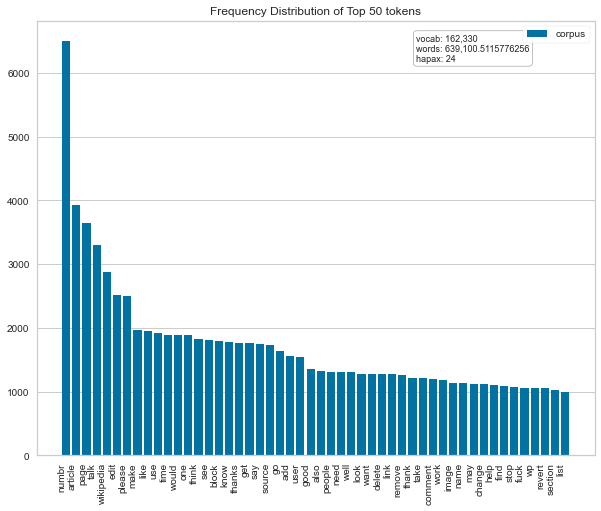

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [254]:
plt.figure(figsize=(10,8))
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(x_train)
visualizer.show()

In [277]:
def j_score(test_y,y_pred):
    jaccard=np.minimum(test_y,y_pred).sum(axis=1)/np.maximum(test_y,y_pred).sum(axis=1)
    return jaccard.mean()*100

In [282]:
j_score(test_y,y_pred_nv)

6.975879396984909

In [283]:
j_score(test_y,y_pred_lg)

39.709222635598145

In [284]:
j_score(test_y,y_pred)

38.622088734323924

In [285]:
j_score(test_y,y_pred1)

36.02463312368977

In [286]:
j_score(test_y,y_pred2)

41.69553502694379

In [287]:
j_score(test_y,y_pred4)

35.19352216594757

In [288]:
j_score(test_y,y_pred5)

42.62656553183976

In [361]:
test1=pd.read_csv('comment test.csv',encoding='utf-8')

In [369]:
test1

id                                       comment_text
0       00001cee341fdb12  Yo bitch Ja Rule is more succesful then you'll...
1       0000247867823ef7  == From RfC == \n\n The title is fine as it is...
2       00013b17ad220c46  " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3       00017563c3f7919a  :If you have a look back at the source, the in...
4       00017695ad8997eb          I don't anonymously edit articles at all.
...                  ...                                                ...
153159  fffcd0960ee309b5  . \n i totally agree, this stuff is nothing bu...
153160  fffd7a9a6eb32c16  == Throw from out field to home plate. == \n\n...
153161  fffda9e8d6fafa9e  " \n\n == Okinotorishima categories == \n\n I ...
153162  fffe8f1340a79fc2  " \n\n == ""One of the founding nations of the...
153163  ffffce3fb183ee80  " \n :::Stop already. Your bullshit is not wel...

[153164 rows x 2 columns]

In [368]:
test_tf=tfidf.transform(test1['comment_text'])

In [373]:
pr=clf7.predict(test_tf)
pr

array([[1, 0, 1, 0, 1, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

In [525]:
pr1=pd.DataFrame(pr,index=test1['id'],columns=['malignant','highly_malignant','rude','threat','abuse','loathe'])
pr1

malignant  highly_malignant  rude  threat  abuse  loathe
id                                                                        
00001cee341fdb12          1                 0     1       0      1       0
0000247867823ef7          1                 0     1       0      1       0
00013b17ad220c46          0                 0     0       0      0       0
00017563c3f7919a          0                 0     0       0      0       0
00017695ad8997eb          0                 0     0       0      0       0
...                     ...               ...   ...     ...    ...     ...
fffcd0960ee309b5          1                 0     0       0      0       0
fffd7a9a6eb32c16          0                 0     0       0      0       0
fffda9e8d6fafa9e          0                 0     0       0      0       0
fffe8f1340a79fc2          0                 0     0       0      0       0
ffffce3fb183ee80          0                 0     1       0      0       0

[153164 rows x 6 columns]

In [530]:
test1['comment_text'][5]

'Thank you for understanding. I think very highly of you and would not revert without discussion.'

In [531]:
pr[5]

array([0, 0, 0, 0, 0, 0])

In [505]:
test1['comment_text'][0]

"Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

In [506]:
pr[0]

array([1, 0, 1, 0, 1, 0])